# Simulation Overview

All our simulations were submitted as jobs on the Memorial Sloan Kettering Cancer Center HPC clusters. Thus, some sample code below will be specific to submitting BSUB jobs to LSF. However, it is easily adaptable to any computing cluster. 

Also, please note that while we provide functions to calculate runtime and memory, it might not always be accurate (especially for GPU methods). In our case, LSF also reports runtime and memory, which we used for our plots. Since each simulation can be submitted as a job, it should be easy for the user to compute runtime and memory usage themselves.

## Import functions and libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# pull max memory usage from LSF job output

def get_max_mem(bjob_path):
    line = os.popen(f'grep "Max Memory" {bjob_path}').read()
    mem = line.strip().split(" ")[-2]
    if mem == '':
        mem = 1
    return mem

# Benchmarking # of Cells

## Generating the data

To run our simulations, we can simply run the script `utils/benchmark-utils/run_benchmark.py`

In particular, we can supply the following arguments:
- `-m` which is the method to benchmark.
- `-p` which is the number of genes (features) in our simulated data.
- `-n` which is the number of cells in our simulated data.
- `--n_pathways` which is the number of active pathways in our simulated data.
- `-o` which is the output file path to store results.

For this simulation, we change `-n`.

As an example, let us benchmark NMF on 300 cells and 2000 genes.

In [14]:
import os

script = '../utils/benchmark-utils/run_benchmark.py'
method = "NMF"
num_genes = 2000
num_cells = 300

os.system(f"python {script} -m {method} -n {num_cells} -p {num_genes} -o ./test.csv")

/Users/mland/opt/anaconda3/envs/scri/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/mland/opt/anaconda3/envs/scri/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


0

## Plotting Results

Since runs can take up to multiple hours, we run each simulation independently and store the results.

In [3]:
results_dir = '../utils/benchmark-utils/cached-results/benchmark_num_cells_results/'
methods = os.listdir(results_dir)
print(methods)

['expimap_gpu_defaults', 'spectra_cpu', 'scHPF', 'netNMFsc', 'spectra_gpu', 'NMF', 'expimap_gpu', 'slalom']


In [4]:
avgs = {}
dfs = []
for m in methods:
    for r in [1, 2, 3]:
        cond = os.listdir(f"{results_dir}{m}")
        n_cells = []
        time = []
        peak_mem = []
        for c in cond:
            bjob_path = f"{results_dir}{m}/{c}/bjob-{r}.stdout"
            if os.path.exists(bjob_path):
                peak_mem.append(get_max_mem(bjob_path))

            results_path = f"{results_dir}{m}/{c}/results-{r}.csv"
            if os.path.exists(results_path):
                df = pd.read_csv(results_path, index_col = 0)
                time.append(df['Time'][0]/60)

            n_cells.append(c.split('_')[0])


        df = pd.DataFrame([n_cells, time, peak_mem], index = ['n_cells', 'Time (min)', 'Peak Memory (GB)']).T.astype(float)
        df = df.sort_values('n_cells')
        df.index = df['n_cells'].values
        df['replicate'] = r
        df['method'] = m
        dfs.append(df)

temp_df = pd.concat(dfs)
temp_df.head()

,n_cells,Time (min),Peak Memory (GB),replicate,method
300.0,300.0,0.306611,1.0,1,expimap_gpu_defaults
1000.0,1000.0,0.870993,1.0,1,expimap_gpu_defaults
5000.0,5000.0,3.456931,1.0,1,expimap_gpu_defaults
10000.0,10000.0,4.646397,2.0,1,expimap_gpu_defaults
25000.0,25000.0,7.018473,2.0,1,expimap_gpu_defaults


### Figure 2g

[Text(0.5, 0, '# of Cells')]

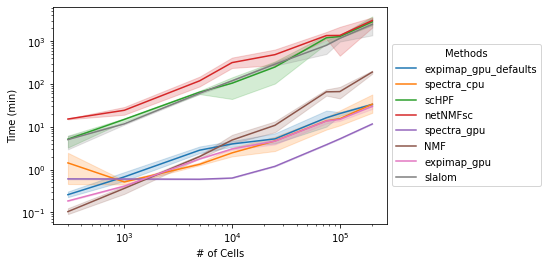

In [7]:
ax = sns.lineplot(data = temp_df, x = 'n_cells', y = 'Time (min)', hue = 'method')
plt.yscale('log')
plt.xscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Methods')
ax.set(xlabel = "# of Cells")

### Figure S5g

[Text(0.5, 0, '# of Cells')]

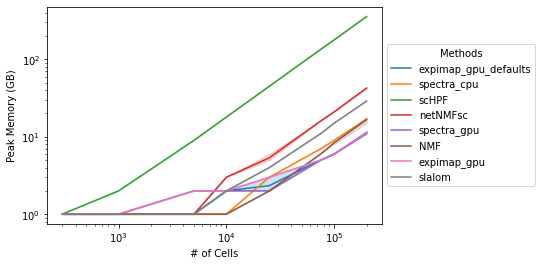

In [8]:
ax = sns.lineplot(data = temp_df, x = 'n_cells', y = 'Peak Memory (GB)', hue = 'method',)
plt.yscale('log')
plt.xscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Methods',)
ax.set(xlabel = "# of Cells")

# Benchmarking # of Genesets

## Generating Data

Again, to run our simulations, we can simply run the script `utils/benchmark-utils/run_benchmark.py`

In particular, we can supply the following arguments:
- `-m` which is the method to benchmark.
- `-p` which is the number of genes (features) in our simulated data.
- `-n` which is the number of cells in our simulated data.
- `--n_pathways` which is the number of active pathways in our simulated data.
- `-o` which is the output file path to store results.

For this simulation, we change `--n_pathways`.

As an example, let us benchmark NMF on 300 cells and 2000 genes on 10 genesets.

In [14]:
import os

script = '../utils/benchmark-utils/run_benchmark.py'
method = "NMF"
num_genes = 2000
num_cells = 300
num_genesets = 10

os.system(f"python {script} -m {method} -n {num_cells} -p {num_genes} -n {num_genesets} -o ./test.csv")

/Users/mland/opt/anaconda3/envs/scri/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


0

## Plotting Data

In [17]:
results_dir = '../utils/benchmark-utils/cached-results/benchmark_genesets_results/'
methods = os.listdir(results_dir)
print(methods)

['expimap_gpu_defaults', 'spectra_cpu', 'scHPF', 'netNMFsc', 'spectra_gpu', 'NMF', 'expimap_gpu', 'slalom']


In [19]:
avgs = {}
genesets_dfs = []
for m in methods:
    if m in ['NMF', 'scHPF']:
        pass
    else:
        for r in [1, 2, 3]:
            cond = os.listdir(f"{results_dir}{m}")
            n_cells = []
            time = []
            peak_mem = []
            for c in cond:
                bjob_path = f"{results_dir}{m}/{c}/bjob-{r}.stdout"
                if os.path.exists(bjob_path):
                    peak_mem.append(get_max_mem(bjob_path))

                results_path = f"{results_dir}{m}/{c}/results-{r}.csv"
                if os.path.exists(results_path):
                    df = pd.read_csv(results_path, index_col = 0)
                    time.append(df['Time'][0]/60)

                n_cells.append(c.split('_')[0])

            df = pd.DataFrame([n_cells, time, peak_mem], index = ['n_genesets', 'Time (min)', 'Peak Memory (GB)']).T.astype(float)
            df = df.sort_values('n_genesets')
            df['replicate'] = r
            df['method'] = m
            genesets_dfs.append(df)

temp_geneset_df = pd.concat(genesets_dfs)
temp_geneset_df.head()

,n_genesets,Time (min),Peak Memory (GB),replicate,method
2,10.0,4.019216,3.0,1,expimap_gpu_defaults
0,20.0,4.406343,3.0,1,expimap_gpu_defaults
3,50.0,4.844274,3.0,1,expimap_gpu_defaults
4,100.0,4.600173,3.0,1,expimap_gpu_defaults
1,200.0,5.148071,4.0,1,expimap_gpu_defaults


### Figure S2

[Text(0.5, 0, '# of Genesets')]

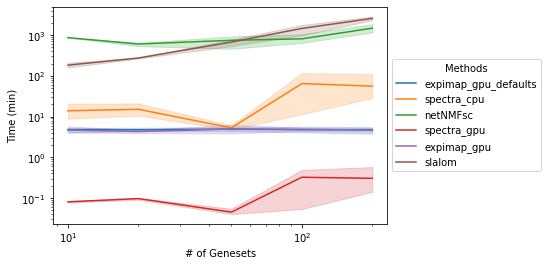

In [20]:
ax = sns.lineplot(data = temp_geneset_df, x = 'n_genesets', y = 'Time (min)', hue = 'method')
plt.yscale('log')
plt.xscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Methods')
ax.set(xlabel = "# of Genesets")


### Figure S5g

Since `expimap_gpu` and `expimap_gpu_defaults` use the exact same memory, we shift the line slightly so it is visible on plot.

In [24]:
temp = []
for idx, row in temp_geneset_df.iterrows():
    if row['method'] == 'expimap_gpu_defaults':
        temp.append(row['Peak Memory (GB)'] + 0.05)
    else:
        temp.append(row['Peak Memory (GB)'])

temp_geneset_df['Peak Memory (GB)2'] = temp

[Text(0.5, 0, '# of Genesets')]

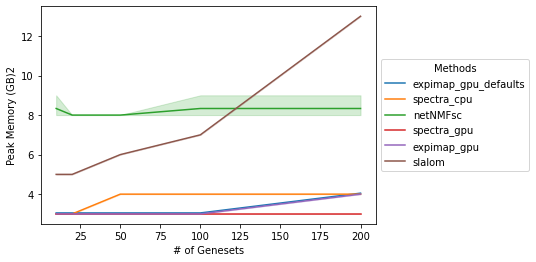

In [25]:
ax = sns.lineplot(data = temp_geneset_df, x = 'n_genesets', y = 'Peak Memory (GB)2', hue = 'method',)
# plt.yscale('log')
# plt.xscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Methods',)
ax.set(xlabel = "# of Genesets")

# Benchmark # of Cell Types

## Generating Data

First, we generate simulated datasets and annotations for each `n = [2, 4, 8, 16, 32, 64]` cell types.

In [ ]:
import numpy as np 
import scanpy as sc 
import torch 
from torch.distributions.log_normal import LogNormal
from torch.distributions.poisson import Poisson
from opt_einsum import contract

cache_dir = 'your_dir_here'


for n in [2, 4, 8, 16, 32, 64]:
    num_cells = 25000
    num_genes = 3000
    num_cell_types = n
    num_global_factors = 10
    num_cell_type_specific_factors = int(128/n)
    
    print(num_cell_types)
    print(num_cell_type_specific_factors)
        
    ### randomly assign a cell type label to each cell
    cell_types = [i for i in range(num_cell_types)]
    labels = np.random.choice(cell_types, size = num_cells)


    ### simulate cell type specific factors
    cell_type_specific_factors = LogNormal(0.,1.).sample([num_cell_types, num_genes, num_cell_type_specific_factors])
    global_factors = LogNormal(0.,1.).sample([num_genes, num_global_factors])

    ## simulate cluster centers 
    cluster_centers = LogNormal(0.,1.).sample([num_cell_types, num_genes])

    ## simulate cell scores

    cell_scores = LogNormal(0.,1.).sample([num_cells, num_global_factors + num_cell_type_specific_factors])

    ## expression data 

    expression_data = np.zeros([num_cells, num_genes])

    for i in range(num_cell_types):
        expression_data[labels == i,:] = Poisson(contract('ij,kj->ik', cell_scores[labels == i,:num_global_factors], global_factors) 
                                                 + contract('ij,kj->ik', cell_scores[labels == i, num_global_factors:], cell_type_specific_factors[i,:,:]) + cluster_centers[i,:].reshape(1,-1)).sample()


    adata = sc.AnnData(expression_data)

    adata.obs['cell_type'] = [str(x) for x in labels]
    adata.var_names = ["gene_{0}".format(i) for i in range(num_genes)]
    id2word = {idx : gene for idx, gene in enumerate(adata.var_names)}
    word2id = {gene : idx for idx, gene in enumerate(adata.var_names)}
    # create annotations file
    annotations = {"global" : {} }
    for i in range(global_factors.shape[1]):
        annotations["global"]["global_factor_{0}".format(i)] = [id2word[x] for x in np.argsort(global_factors[:,i].numpy())[::-1][:10]]

    for j, ct in enumerate(cell_types):
        annotations[str(ct)] = {}
        for i in range(cell_type_specific_factors.shape[2]):
            annotations[str(ct)]["cell_type_{0}_factor_{1}".format(j, i)] = [id2word[x] for x in np.argsort(cell_type_specific_factors[j,:,i].numpy())[::-1][:10]]
    
    # DON'T change naming convention as it is used in the next script. If you change here, change both.
    with open(f'{cache_dir}{num_cell_type_specific_factors}_ctf_{num_cell_types}_ct_annotations.json', 'w') as f:
        f.write(json.dumps(annotations))
        
    adata.write_h5ad(f'{cache_dir}{num_cell_type_specific_factors}_ctf_{num_cell_types}_ct.h5ad')

After, we can simulate runtime using `utils/benchmark-utils/celltype-benchmark.py`

NOTE: We do not have to specify GPU or CPU. If GPU is available, Spectra will automatically run GPU. Otherwise, will run CPU. Thus, submit job accordingly.

In [ ]:
import os

celltype_script = '../utils/benchmark-utils/celltype-benchmark.py'
num_cell_types = 2

# cache dir from above cell
cache_dir = 'your_dir_here'

os.system(f"python {celltype_script} --num_cell_types {num_cell_types} --cache_dir {cache_dir} -o cell_type_out.csv")

### Plotting Data

In [28]:
results_dir = '../utils/benchmark-utils/cached-results/benchmark_celltype_results/'
methods = os.listdir(results_dir)
print(methods)

['spectra_cpu', 'spectra_gpu']


In [29]:
avgs = {}
celltypes_dfs = []
for m in methods:
    for r in [1, 2, 3]:
        cond = os.listdir(f"{results_dir}{m}")
        n_cells = []
        time = []
        peak_mem = []
        for c in cond:
            bjob_path = f"{results_dir}{m}/{c}/bjob-{r}.stdout"
            if os.path.exists(bjob_path):
                peak_mem.append(get_max_mem(bjob_path))

            results_path = f"{results_dir}{m}/{c}/results-{r}.csv"
            if os.path.exists(results_path):
                df = pd.read_csv(results_path, index_col = 0)
                time.append(df['Time'][0]/60)

            n_cells.append(c.split('_')[0])

        df = pd.DataFrame([n_cells, time, peak_mem], index = ['n_celltypes', 'Time (min)', 'Peak Memory (GB)']).T.astype(float)
        df = df.sort_values('n_celltypes')
        df['replicate'] = r
        df['method'] = m
        celltypes_dfs.append(df)
        
temp_celltype_df = pd.concat(celltypes_dfs)
temp_celltype_df.head()

,n_celltypes,Time (min),Peak Memory (GB),replicate,method
5,2.0,462.009585,2.0,1,spectra_cpu
4,4.0,449.921109,2.0,1,spectra_cpu
2,8.0,1092.954758,3.0,1,spectra_cpu
1,16.0,702.536757,6.0,1,spectra_cpu
0,32.0,1747.808671,10.0,1,spectra_cpu


# Figure S5h

[Text(0.5, 0, '# of Cell Types')]

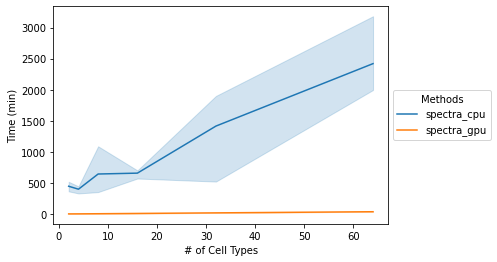

In [30]:
ax = sns.lineplot(data = temp_celltype_df, x = 'n_celltypes', y = 'Time (min)', hue = 'method')
# plt.yscale('log')
# plt.xscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Methods')
ax.set(xlabel = "# of Cell Types")

# Figure S5g

[Text(0.5, 0, '# of Cell Types')]

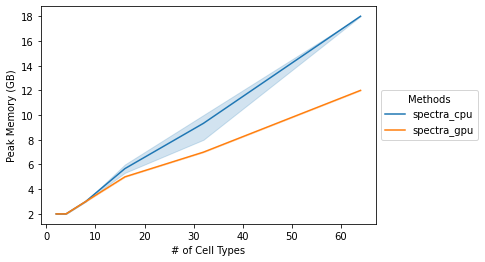

In [31]:
ax = sns.lineplot(data = temp_celltype_df, x = 'n_celltypes', y = 'Peak Memory (GB)', hue = 'method',)
# plt.yscale('log')
# plt.xscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Methods',)
ax.set(xlabel = "# of Cell Types")